# Image Classifier with Pretrained Model

# 1. Import libraries

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

from modules.others import set_seeds
from modules.data_prep import create_dataloaders
from modules.others import plot_an_image

!pip install torchinfo
from torchinfo import summary

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# !rm -rf /content/data1000
!tar -xzvf /content/flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

# 2. Create DataLoaders

In [ ]:
# Setup parameters to train and test images
path = "/content/flower_photos"
IMG_SIZE = 224 # image siz
BATCH_SIZE = 32 # batch size

# Create transform pipeline manually
image_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# Create data loaders
train_dataloader, test_dataloader, class_names = create_dataloaders(root_path=path, transform=image_transforms, batch_size=BATCH_SIZE)

print(f"Manually created transforms: {image_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


(<torch.utils.data.dataloader.DataLoader at 0x7ba7e7d9bb20>,
 <torch.utils.data.dataloader.DataLoader at 0x7ba7e813fd30>)

# 3. Plot an image

In [ ]:
# Visualize a image
plot_an_image(train_dataloader, class_names)

# 4. Get the model

In [ ]:
set_seeds()
# 1. Get pretrained weights
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup the model with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:07<00:00, 48.6MB/s]


In [ ]:
summary(model=pretrained_vit, input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"], col_width=20, row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 5]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

# 5. Train the model

In [ ]:
# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = train(model=pretrained_vit, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
                               optimizer=optimizer, loss_fn=loss_fn, epochs=10, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7004 | train_acc: 0.7750 | test_loss: 0.4039 | test_acc: 0.8963
Epoch: 2 | train_loss: 0.3619 | train_acc: 0.8979 | test_loss: 0.3156 | test_acc: 0.9058
Epoch: 3 | train_loss: 0.2830 | train_acc: 0.9201 | test_loss: 0.2794 | test_acc: 0.9196
Epoch: 4 | train_loss: 0.2409 | train_acc: 0.9338 | test_loss: 0.2519 | test_acc: 0.9236
Epoch: 5 | train_loss: 0.2102 | train_acc: 0.9438 | test_loss: 0.2423 | test_acc: 0.9222
Epoch: 6 | train_loss: 0.1874 | train_acc: 0.9503 | test_loss: 0.2320 | test_acc: 0.9277
Epoch: 7 | train_loss: 0.1696 | train_acc: 0.9578 | test_loss: 0.2257 | test_acc: 0.9249
Epoch: 8 | train_loss: 0.1580 | train_acc: 0.9625 | test_loss: 0.2221 | test_acc: 0.9291
Epoch: 9 | train_loss: 0.1451 | train_acc: 0.9671 | test_loss: 0.2174 | test_acc: 0.9318
Epoch: 10 | train_loss: 0.1337 | train_acc: 0.9706 | test_loss: 0.2135 | test_acc: 0.9304


# 6. Evaluation

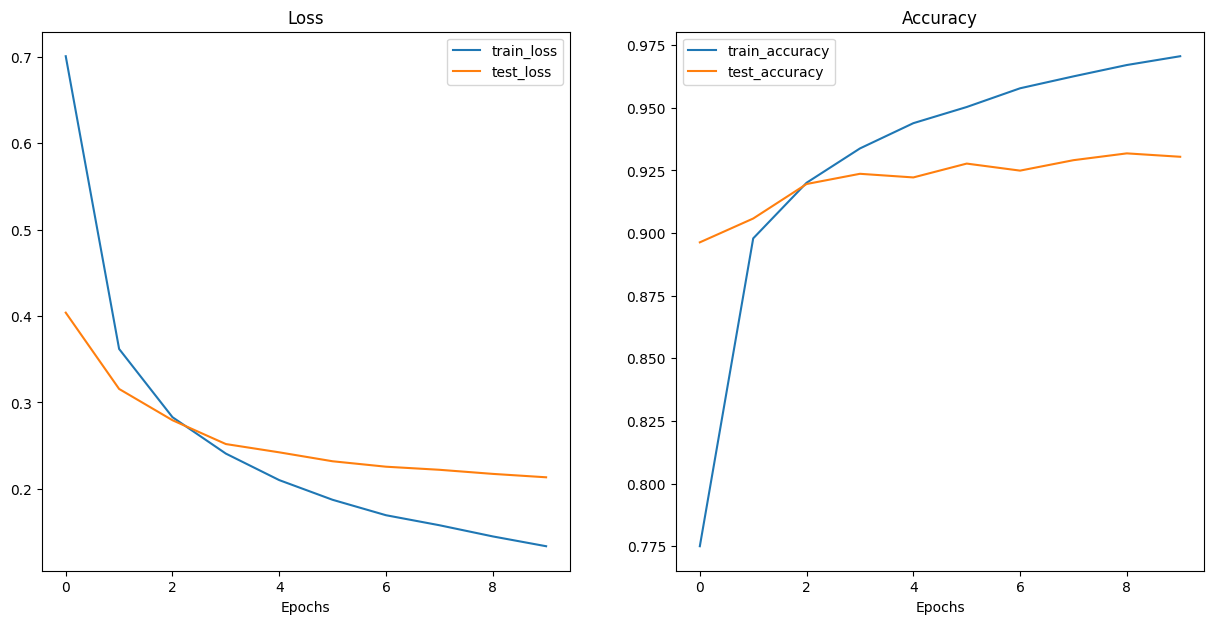

In [ ]:
# Plot the losses and accs
show_losses_and_accs(pretrained_vit_results)

# 7. Predict the results

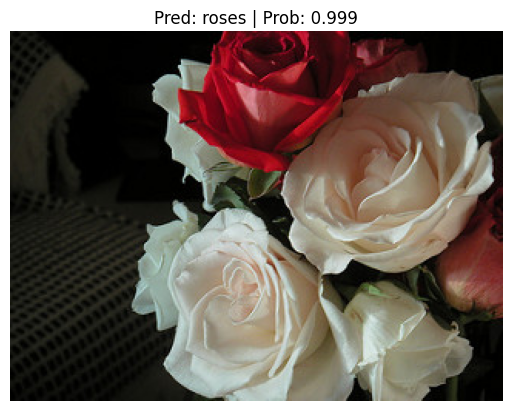

In [ ]:
# Setup an mage path
image_path = "/content/flower_photos/roses/102501987_3cdb8e5394_n.jpg"
pred_and_plot_image(model=pretrained_vit, image_path=image_path, class_names=class_names)

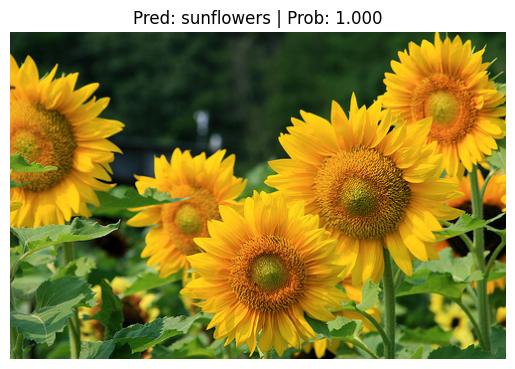

In [ ]:
# Setup an image path
image_pat_1 = "/content/flower_photos/sunflowers/1008566138_6927679c8a.jpg"
pred_and_plot_image(model=pretrained_vit, image_path=image_pat_1, class_names=class_names)